In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_regression,f_classif
from tqdm import tqdm

from sklearn.metrics import accuracy_score, confusion_matrix
import csv

from sklearn import svm,datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Both Angle And Distance based feature****

In [2]:
csv1 = pd.read_csv("/kaggle/input/dis-f-train/dis-f-train.csv")
csv2 = pd.read_csv("/kaggle/input/dis-f-test/dis-f-test.csv")

p = {"x":csv1, "y":csv2}
a1 = pd.concat(p, ignore_index=True)



In [8]:
a1

,0 2,0 3,0 4,0 6,0 7,0 8,0 10,0 11,0 12,0 14,...,15 19,15 20,16 17,16 18,16 19,16 20,17 19,17 20,18 20,class
0,0.154455,0.212572,0.228182,0.299624,0.351066,0.398516,0.238532,0.173316,0.152514,0.213272,...,0.026253,0.044789,0.050853,0.072077,0.027921,0.026696,0.028143,0.035025,0.072891,1.0
1,0.154381,0.207008,0.244948,0.362460,0.435185,0.495746,0.277713,0.197102,0.170137,0.244818,...,0.034586,0.034336,0.053575,0.083657,0.051234,0.032846,0.037695,0.044277,0.071728,1.0
2,0.161287,0.226587,0.261301,0.331710,0.391509,0.448260,0.257987,0.186409,0.173754,0.229712,...,0.034613,0.042824,0.043888,0.072628,0.041498,0.034714,0.016428,0.030267,0.070798,1.0
3,0.150558,0.207807,0.264780,0.347517,0.422240,0.482197,0.239185,0.167283,0.157609,0.202346,...,0.033175,0.028713,0.062455,0.065237,0.048828,0.028373,0.075694,0.063722,0.054536,1.0
4,0.124271,0.165311,0.206924,0.319967,0.391539,0.443894,0.238716,0.185389,0.153893,0.198395,...,0.032388,0.048824,0.098366,0.100990,0.054493,0.031517,0.056692,0.080747,0.086202,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.187207,0.246665,0.304890,0.319881,0.325133,0.313729,0.306983,0.249176,0.211583,0.285892,...,0.030596,0.053972,0.065931,0.069170,0.029751,0.022865,0.058249,0.047028,0.069944,10.0
298,0.171448,0.222275,0.283740,0.324667,0.316464,0.294761,0.264218,0.194371,0.178479,0.229977,...,0.042057,0.049595,0.088920,0.067857,0.049238,0.042932,0.083403,0.072325,0.050953,10.0
299,0.201297,0.258752,0.333429,0.358879,0.366048,0.355048,0.294847,0.214549,0.194847,0.264833,...,0.050889,0.057650,0.099689,0.095155,0.063991,0.054414,0.080174,0.075907,0.074816,10.0
300,0.143785,0.206840,0.257480,0.248548,0.267984,0.267653,0.286220,0.274741,0.235328,0.276300,...,0.048884,0.064468,0.081256,0.069666,0.044601,0.036620,0.064700,0.047538,0.044237,10.0


In [4]:
csv1 = pd.read_csv("/kaggle/input/angle-f-train/angle-f-train.csv")
csv2 = pd.read_csv("/kaggle/input/angle-f-testcsv/angle-f-test.csv")
p = {"x":csv1, "y":csv2}
b = pd.concat(p, ignore_index=True)

In [10]:
b

,angleX_0_1,angleY_0_1,angleZ_0_1,angleX_0_2,angleY_0_2,angleZ_0_2,angleX_0_3,angleY_0_3,angleZ_0_3,angleX_0_4,...,angleX_18_19,angleY_18_19,angleZ_18_19,angleX_18_20,angleY_18_20,angleZ_18_20,angleX_19_20,angleY_19_20,angleZ_19_20,class
0,2.009596,2.651965,1.773882,1.827159,2.845800,1.715092,1.602296,2.975363,1.733959,1.426592,...,2.063838,0.567921,1.312399,1.893804,0.511284,1.189240,1.556405,0.587756,0.983264,1.0
1,2.047260,2.347044,2.149125,1.882858,2.616601,1.978131,1.655461,2.743703,1.958575,1.530834,...,2.025488,0.486212,1.410528,2.189883,0.718540,1.254752,2.428277,1.224391,0.977171,1.0
2,1.896196,2.667293,1.903048,1.729420,2.869084,1.790481,1.514031,2.925855,1.778703,1.367420,...,2.129967,0.615300,1.341296,2.146979,0.722516,1.186656,2.126853,0.992265,0.863314,1.0
3,1.854365,1.985423,2.628958,1.785440,2.219314,2.446493,1.571706,2.315549,2.396839,1.416455,...,2.144619,0.583071,1.478648,2.441510,0.985473,1.232930,2.229375,2.136204,0.949927,1.0
4,1.863755,2.135419,2.487988,1.776471,2.286950,2.383522,1.572969,2.319597,2.392788,1.417256,...,2.042769,0.499044,1.420757,2.116110,0.616064,1.313305,2.206137,0.795501,1.162128,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.970407,2.734803,1.498749,1.935142,2.777194,1.576699,1.957424,2.745624,1.652043,1.900034,...,2.162196,0.686177,1.265064,1.846002,0.465031,1.206022,1.427800,0.413477,1.185673,10.0
298,2.264745,2.437099,1.468698,2.268362,2.438914,1.641837,2.277818,2.393150,1.775028,2.249347,...,1.494131,0.352116,1.227840,1.111129,0.708653,1.074512,0.480319,1.617347,1.093124,10.0
299,2.082091,2.540058,1.282512,2.084492,2.615499,1.467217,2.082242,2.627245,1.620629,2.043643,...,1.541545,0.328228,1.243972,1.245646,0.553807,1.139780,0.672898,1.156715,1.074712,10.0
300,1.987770,2.681026,1.754917,1.872315,2.792432,1.741469,1.902949,2.748621,1.772949,1.905520,...,2.926290,1.706105,1.404359,2.619138,1.148731,1.281836,2.078602,0.616426,1.252772,10.0


In [5]:
#combine two DataFrames horizontally (i.e., side-by-side)
#removes the column named "class" from the DataFrame a1
A1=a1.drop('class',axis=1)
#creates a new DataFrame a by combining the columns of A1 and b
a=pd.concat([A1,b],axis=1)
print(a)


          0 2       0 3       0 4       0 6       0 7       0 8      0 10  \
0    0.154455  0.212572  0.228182  0.299624  0.351066  0.398516  0.238532   
1    0.154381  0.207008  0.244948  0.362460  0.435185  0.495746  0.277713   
2    0.161287  0.226587  0.261301  0.331710  0.391509  0.448260  0.257987   
3    0.150558  0.207807  0.264780  0.347517  0.422240  0.482197  0.239185   
4    0.124271  0.165311  0.206924  0.319967  0.391539  0.443894  0.238716   
..        ...       ...       ...       ...       ...       ...       ...   
297  0.187207  0.246665  0.304890  0.319881  0.325133  0.313729  0.306983   
298  0.171448  0.222275  0.283740  0.324667  0.316464  0.294761  0.264218   
299  0.201297  0.258752  0.333429  0.358879  0.366048  0.355048  0.294847   
300  0.143785  0.206840  0.257480  0.248548  0.267984  0.267653  0.286220   
301  0.186694  0.235365  0.296140  0.249655  0.273687  0.290856  0.242168   

         0 11      0 12      0 14  ...  angleX_18_19  angleY_18_19  \
0    

In [6]:
# randomly permutes the rows of a.
a = a.sample(frac=1, random_state=0)
#extracts the values in the "class" column of DataFrame a
#and stores them in a NumPy array Y
Y=np.array(a['class'])
# removes the "class" column from the DataFrame
a=a.drop('class',axis=1)
#convert The feature in Numpy Arra ,Input of ML Model
X=np.array(a)

In [31]:
#X
print(X.shape)

(302, 820)


In [27]:
#Y
#contains the labels or target values of a supervised learning problem, 
print(Y.shape)

(302,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# ****trains an SVM classifier on the training data, saves the trained model to a file, and then evaluates the performance of the model on the test data using the accuracy_score and confusion_matrix functions.

Runtime of the program is 0.00881505012512207
Runtime of the program is 0.0034949779510498047
0.9836065573770492


<AxesSubplot:>

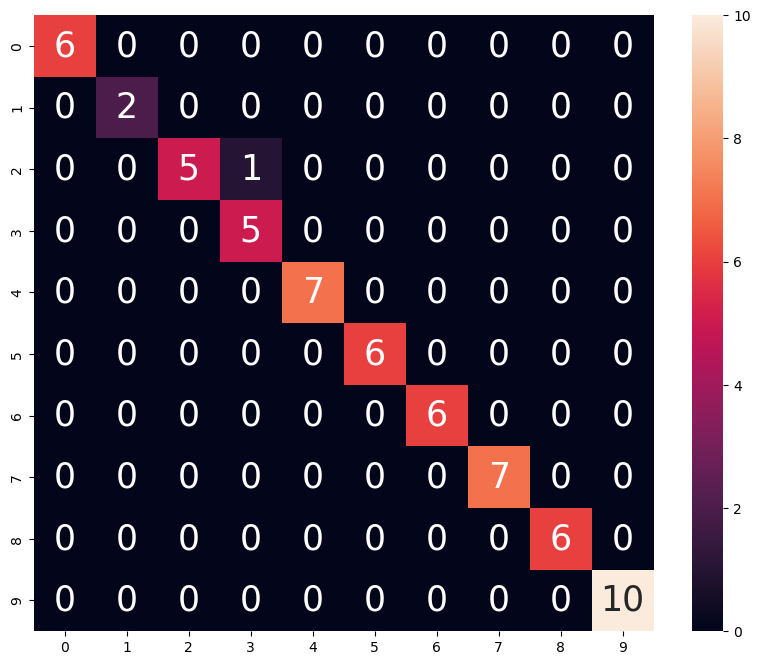

In [10]:
# evaluates the performance of the model on the test data
from sklearn.svm import SVC
#1000, 'gamma': 0.01, 'kernel': 'rbf'

import time
import pickle
start = time.time()

#creates an instance of the Support Vector Machine (SVM) 
#classifier with a regularization parameter C equal to 10.
model = SVC(C=10) #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
#trains the SVM classifier
model.fit(X_train, Y_train)

end = time.time()
print(f"Runtime of the program is {end - start}")

#used to store the trained SVM model for future use.
file_to_store = open("svm-1.pickle", "wb")
#allows us to save the trained model and load it later for use in other programs.
pickle.dump(model, file_to_store)

from sklearn.metrics import accuracy_score, confusion_matrix

start = time.time()
Y_pred = model.predict(X_test)
end = time.time()
print(f"Runtime of the program is {end - start}")


print(accuracy_score(Y_test, Y_pred))
c=confusion_matrix(Y_test, Y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(c, annot=True, annot_kws={"size": 25}, fmt='d')

# Overall, this code performs cross-validation on the dataset using an SVM classifier with C=1000 and gamma=0.0001. It then prints the accuracy rate for each fold of the cross-validation, as well as the average accuracy rate across all folds. This provides a measure of how well the SVM classifier is able to generalize to new, unseen data.

In [23]:
clf = svm.SVC(C=1000,gamma=0.0001)
scores = cross_val_score(clf, X, Y, cv=5)
print("Each accuracy rate=", scores)
print("Accuracy rate =", scores.mean())

Each accuracy rate= [1.         0.98360656 1.         1.         0.96666667]
Accuracy rate = 0.9900546448087433


# #ALL Distance features (SVM)****

In [41]:
csv1 = pd.read_csv("/kaggle/input/dis-f-train/dis-f-train.csv")
csv2 = pd.read_csv("/kaggle/input/dis-f-test/dis-f-test.csv")
p = {"x":csv1, "y":csv2}
a1 = pd.concat(p, ignore_index=True)

In [42]:
Y = np.array(a1['class'])
A1=a1.drop('class',axis=1)
X=np.array(A1)

In [43]:
print(X.shape)

(302, 190)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Runtime of the program is 0.0075070858001708984
Runtime of the program is 0.0027518272399902344
0.9672131147540983


<AxesSubplot:>

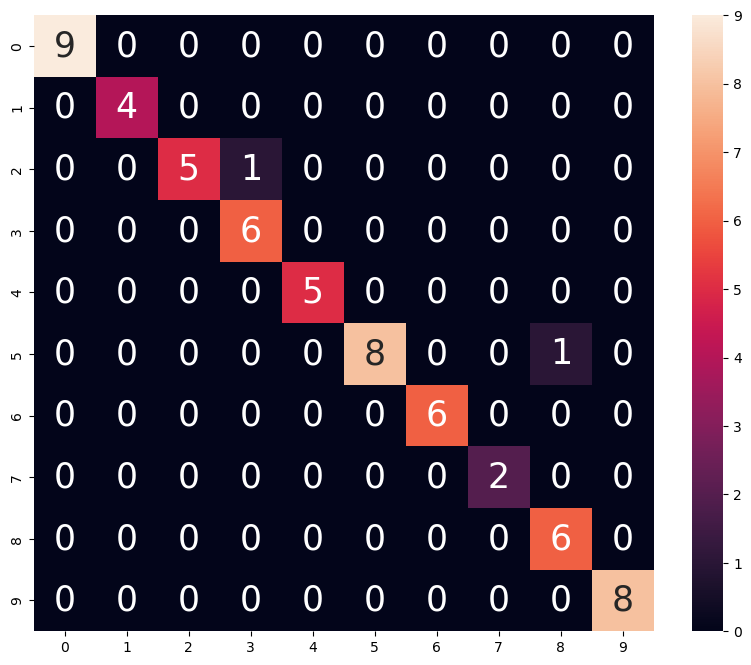

In [15]:
from sklearn.svm import SVC
#1000, 'gamma': 0.01, 'kernel': 'rbf'
start = time.time()

model = SVC(C=1000) #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
model.fit(X_train, Y_train)


end = time.time()
print(f"Runtime of the program is {end - start}")
file_to_store = open("svm-2.pickle", "wb")
pickle.dump(model, file_to_store)

from sklearn.metrics import accuracy_score, confusion_matrix

start = time.time()
Y_pred = model.predict(X_test)
end = time.time()
print(f"Runtime of the program is {end - start}")

#print(Y_test)
#print(Y_pred)
print(accuracy_score(Y_test, Y_pred))
c=confusion_matrix(Y_test, Y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(c, annot=True, annot_kws={"size": 25}, fmt='d')

In [16]:
# define the model
clf = svm.SVC(gamma=0.01,kernel='rbf',C=100)

# perform cross-validation
scores = cross_val_score(clf, X, Y, cv=5)
print("Each accuracy rate =", scores)
print("Accuracy rate =", scores.mean())

Each accuracy rate = [0.96721311 0.93442623 0.95       0.96666667 0.96666667]
Accuracy rate = 0.9569945355191256


# ALL Angle Feature****

In [17]:
csv1 = pd.read_csv("/kaggle/input/angle-f-train/angle-f-train.csv")
csv2 = pd.read_csv("/kaggle/input/angle-f-testcsv/angle-f-test.csv")
p = {"x":csv1, "y":csv2}
b = pd.concat(p, ignore_index=True)

In [18]:
Y = np.array(b['class'])
B1=b.drop('class',axis=1)
X=np.array(B1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Runtime of the program is 0.012844562530517578
Runtime of the program is 0.004388332366943359
1.0


<AxesSubplot:>

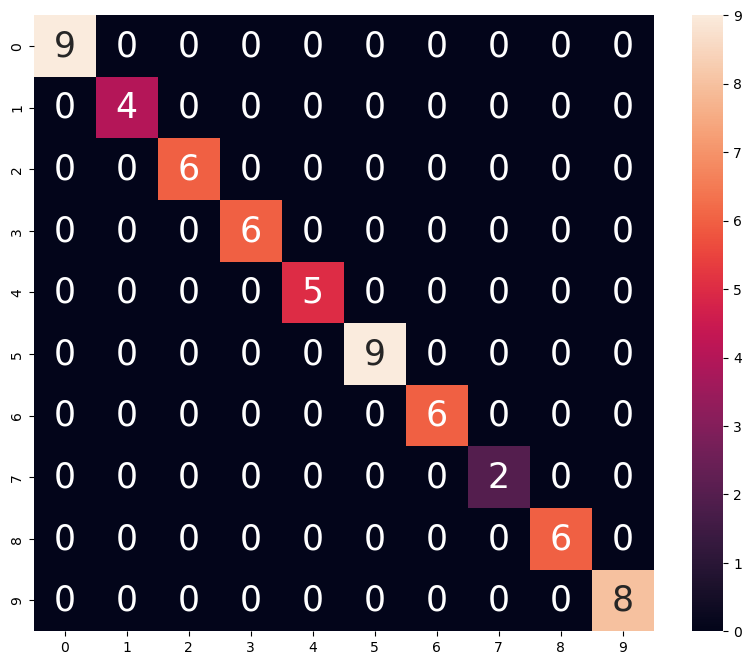

In [20]:
from sklearn.svm import SVC
#1000, 'gamma': 0.01, 'kernel': 'rbf'
start = time.time()

model = SVC(C=1000) #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
model.fit(X_train, Y_train)


end = time.time()
print(f"Runtime of the program is {end - start}")
file_to_store = open("svm-3.pickle", "wb")
pickle.dump(model, file_to_store)

from sklearn.metrics import accuracy_score, confusion_matrix

start = time.time()
Y_pred = model.predict(X_test)
end = time.time()
print(f"Runtime of the program is {end - start}")

#print(Y_test)
#print(Y_pred)
print(accuracy_score(Y_test, Y_pred))
c=confusion_matrix(Y_test, Y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(c, annot=True, annot_kws={"size": 25}, fmt='d')

In [21]:
# define the mode
clf = svm.SVC(C=1000)

# perform cross-validation
scores = cross_val_score(clf, X, Y, cv=5)
print("Each accuracy rate =", scores)
print("Accuracy rate =", scores.mean())

Each accuracy rate = [0.96721311 0.98360656 0.98333333 1.         0.98333333]
Accuracy rate = 0.9834972677595628


# LightGBM For Distance Features****

Distance

In [44]:
csv1 = pd.read_csv("/kaggle/input/dis-f-train/dis-f-train.csv")
csv2 = pd.read_csv("/kaggle/input/dis-f-test/dis-f-test.csv")

p = {"x":csv1, "y":csv2}
a1 = pd.concat(p, ignore_index=True)
csv1 = pd.read_csv("/kaggle/input/angle-f-train/angle-f-train.csv")
csv2 = pd.read_csv("/kaggle/input/angle-f-testcsv/angle-f-test.csv")
p = {"x":csv1, "y":csv2}
b = pd.concat(p, ignore_index=True)


In [45]:
Y = np.array(a1['class'])
A1=a1.drop('class',axis=1)
X=np.array(A1)

In [46]:
print(X.shape)

(302, 190)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [49]:
import lightgbm as lgb_original
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score # For model evaluation (percentage of correct answers)
from sklearn.metrics import log_loss # For model evaluation (logloss)
     
from sklearn.metrics import roc_auc_score # for model evaluation (auc)
import numpy as np
from sklearn import datasets, model_selection
import lightgbm as lgb

start = time.time()


import lightgbm as lgb

model2 = lgb.LGBMClassifier(objective='multiclass',
                        num_leaves=50,
                        learning_rate=0.1,
                        min_child_samples=25,
                        n_estimators=86)
model2.fit(X_train, Y_train,
        eval_set=[(X_test, Y_test)],
           callbacks=[lgb.log_evaluation()],
           verbose=False)





end = time.time()
print(f"Runtime of the program is {end - start}")
file_to_store = open("gbm-1.pickle", "wb")
pickle.dump(model2, file_to_store)

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 1.86855
[2]	valid_0's multi_logloss: 1.60478
[3]	valid_0's multi_logloss: 1.40251
[4]	valid_0's multi_logloss: 1.22507
[5]	valid_0's multi_logloss: 1.08855
[6]	valid_0's multi_logloss: 0.984077
[7]	valid_0's multi_logloss: 0.88363
[8]	valid_0's multi_logloss: 0.780301
[9]	valid_0's multi_logloss: 0.699459
[10]	valid_0's multi_logloss: 0.626951
[11]	valid_0's multi_logloss: 0.568187
[12]	valid_0's multi_logloss: 0.512576
[13]	valid_0's multi_logloss: 0.465692
[14]	valid_0's multi_logloss: 0.41657
[15]	valid_0's multi_logloss: 0.383436
[16]	valid_0's multi_logloss: 0.351767
[17]	valid_0's multi_logloss: 0.319714
[18]	valid_0's multi_logloss: 0.292656
[19]	valid_0's multi_logloss: 0.270404
[20]	valid_0's multi_logloss: 0.250543
[21]	valid_0's multi_logloss: 0.228198
[22]	valid_0's multi_logloss: 0.217979
[23]	valid_0's multi_logloss: 0.20423
[24]	valid_0's multi_logloss: 0.192039
[25]	valid_0's multi_logloss: 0.183986
[26]	valid_0's multi_logloss: 0.177872
[27

Runtime of the program is 0.0030837059020996094
0.9340659340659341


<AxesSubplot:>

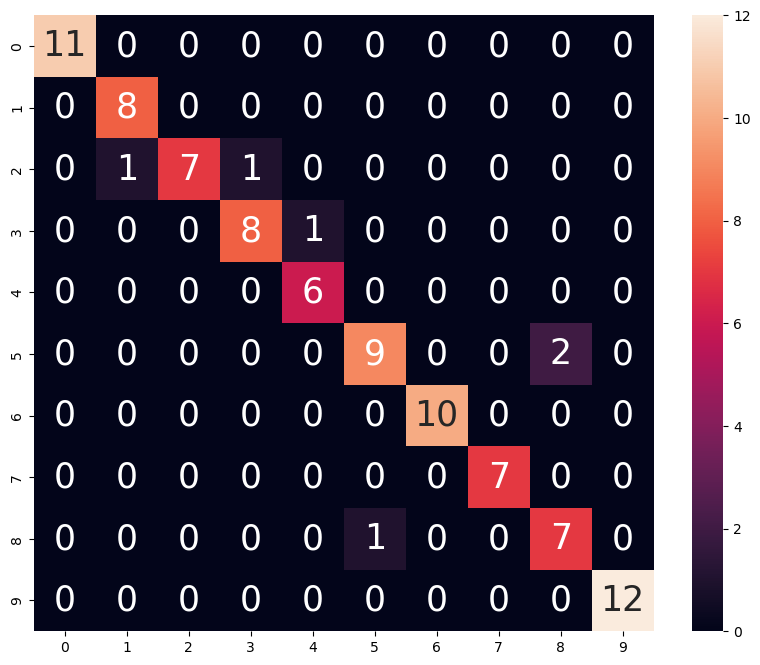

In [50]:
# predict test data
start = time.time()
y_pred = model2.predict(X_test)
end = time.time()
print(f"Runtime of the program is {end - start}")

# Calculate Accuracy
accuracy = sum(Y_test == y_pred) / len(Y_test)
print(accuracy)
c=confusion_matrix(Y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(c, annot=True, annot_kws={"size": 25}, fmt='d')

# LIGHT GBM For All Angle Feature****

In [26]:
Y = np.array(b['class'])
B1=b.drop('class',axis=1)
X=np.array(B1)

In [29]:
print(X.shape)

(302, 630)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [31]:
import lightgbm as lgb_original
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score # For model evaluation (percentage of correct answers
from sklearn.metrics import log_loss # For model evaluation (logloss)    
from sklearn.metrics import roc_auc_score # for model evaluation (auc)
import numpy as np
from sklearn import datasets, model_selection
import lightgbm as lgb
start = time.time()
model2 = lgb.LGBMClassifier(objective='multiclass',
                        num_leaves = 50,
                        learning_rate=0.1,
                        min_child_samples=25,
                        n_estimators=82)
model2.fit(X_train, Y_train,
        eval_set=[(X_test, Y_test)],
           verbose=1)
end = time.time()
print(f"Runtime of the program is {end - start}")
file_to_store = open("gbm-2.pickle", "wb")
pickle.dump(model2, file_to_store)

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 1.84376
[2]	valid_0's multi_logloss: 1.55032
[3]	valid_0's multi_logloss: 1.33744
[4]	valid_0's multi_logloss: 1.17946
[5]	valid_0's multi_logloss: 1.05417
[6]	valid_0's multi_logloss: 0.956793
[7]	valid_0's multi_logloss: 0.860657
[8]	valid_0's multi_logloss: 0.798109
[9]	valid_0's multi_logloss: 0.729142
[10]	valid_0's multi_logloss: 0.669079
[11]	valid_0's multi_logloss: 0.610918
[12]	valid_0's multi_logloss: 0.565457
[13]	valid_0's multi_logloss: 0.528824
[14]	valid_0's multi_logloss: 0.492031
[15]	valid_0's multi_logloss: 0.462134
[16]	valid_0's multi_logloss: 0.432537
[17]	valid_0's multi_logloss: 0.402171
[18]	valid_0's multi_logloss: 0.386545
[19]	valid_0's multi_logloss: 0.3671
[20]	valid_0's multi_logloss: 0.351621
[21]	valid_0's multi_logloss: 0.33524
[22]	valid_0's multi_logloss: 0.322225
[23]	valid_0's multi_logloss: 0.308821
[24]	valid_0's multi_logloss: 0.299028
[25]	valid_0's multi_logloss: 0.290128
[26]	valid_0's multi_logloss: 0.281247
[27

# predict test data For All Angle Feature LIGHT GBM****

Runtime of the program is 0.002987384796142578
0.945054945054945


<AxesSubplot:>

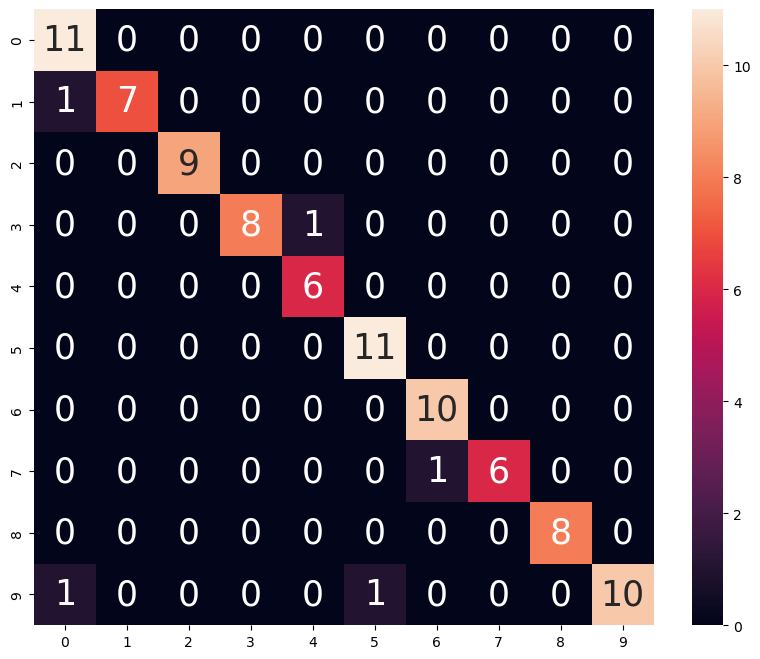

In [32]:
# predict test data
start = time.time()
y_pred = model2.predict(X_test)
end = time.time()
print(f"Runtime of the program is {end - start}")

# Calculate Accuracy
accuracy = sum(Y_test == y_pred) / len(Y_test)
print(accuracy)
c=confusion_matrix(Y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(c, annot=True, annot_kws={"size": 25}, fmt='d')

# Both Angle and distance based Features****

In [34]:
A1=a1.drop('class',axis=1)
a=pd.concat([A1,b],axis=1)
#print(a)
a = a.sample(frac=1, random_state=0)
Y=np.array(a['class'])
a=a.drop('class',axis=1)
X=np.array(a)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [36]:
import lightgbm as lgb_original
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score 
from sklearn.metrics import log_loss      
from sklearn.metrics import roc_auc_score 
import numpy as np
from sklearn import datasets, model_selection
import lightgbm as lgb
start = time.time()
model2 = lgb.LGBMClassifier(objective='multiclass',
                        num_leaves = 50,
                        learning_rate=0.1,
                        min_child_samples=25,
                        n_estimators=200)
model2.fit(X_train, Y_train,
        eval_set=[(X_test, Y_test)],
           verbose=1)
end = time.time()
print(f"Runtime of the program is {end - start}")
file_to_store = open("gbm-3.pickle", "wb")
pickle.dump(model2, file_to_store)

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's multi_logloss: 1.80863
[2]	valid_0's multi_logloss: 1.48964
[3]	valid_0's multi_logloss: 1.26834
[4]	valid_0's multi_logloss: 1.09926
[5]	valid_0's multi_logloss: 0.957387
[6]	valid_0's multi_logloss: 0.842016
[7]	valid_0's multi_logloss: 0.746415
[8]	valid_0's multi_logloss: 0.675837
[9]	valid_0's multi_logloss: 0.608517
[10]	valid_0's multi_logloss: 0.557597
[11]	valid_0's multi_logloss: 0.511633
[12]	valid_0's multi_logloss: 0.473067
[13]	valid_0's multi_logloss: 0.441967
[14]	valid_0's multi_logloss: 0.41504
[15]	valid_0's multi_logloss: 0.389466
[16]	valid_0's multi_logloss: 0.368749
[17]	valid_0's multi_logloss: 0.356105
[18]	valid_0's multi_logloss: 0.338322
[19]	valid_0's multi_logloss: 0.319621
[20]	valid_0's multi_logloss: 0.313542
[21]	valid_0's multi_logloss: 0.299282
[22]	valid_0's multi_logloss: 0.294745
[23]	valid_0's multi_logloss: 0.285773
[24]	valid_0's multi_logloss: 0.281149
[25]	valid_0's multi_logloss: 0.271928
[26]	valid_0's multi_logloss: 0.273001


Runtime of the program is 0.003077983856201172
0.9560439560439561


<AxesSubplot:>

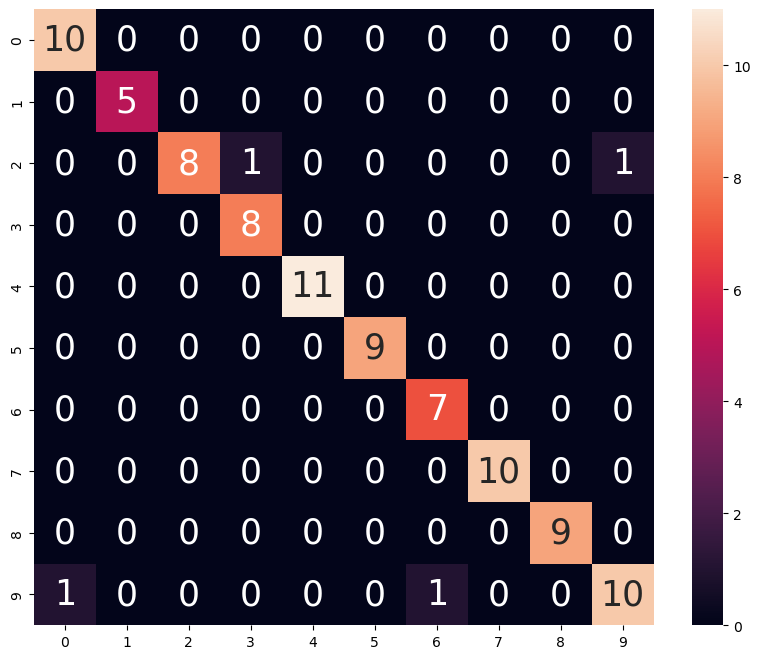

In [37]:
start = time.time()
y_pred = model2.predict(X_test)
end = time.time()
print(f"Runtime of the program is {end - start}")


accuracy = sum(Y_test == y_pred) / len(Y_test)
print(accuracy)
c=confusion_matrix(Y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
sns.heatmap(c, annot=True, annot_kws={"size": 25}, fmt='d')